<a href="https://colab.research.google.com/github/nisha1365/GEN-AI-POC/blob/main/New_tweet_piechart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
topics_list = pd.read_csv("/content/topic_info_filtered.csv")
topics_list

,Topic,Count,Name,Representation,Representative_Docs
0,0,11951,0_day_hemophilia_haemophilia_care,"['day', 'hemophilia', 'haemophilia', 'care', '...","['world hemophilia day', 'world hemophilia day..."
1,1,3131,1_viii_hemgenix_fda_genetherapy,"['viii', 'hemgenix', 'fda', 'genetherapy', 'pf...",['gene therapy for the treatment of hemophilia...
2,2,1236,2_contaminatedblood_hiv_contaminated_blood,"['contaminatedblood', 'hiv', 'contaminated', '...",['infected blood inquiry parent and child who ...
3,3,948,3_victoria_chromosome_inbreeding_cousin,"['victoria', 'chromosome', 'inbreeding', 'cous...",['why is hemophilia sometimes called the royal...
4,4,600,4_march_bleedingdisordersawarenessmonth_bleedi...,"['march', 'bleedingdisordersawarenessmonth', '...",['march is bleeding disorder awareness month h...
...,...,...,...,...,...
94,94,16,94_mary_nebraska_madison_lake,"['mary', 'nebraska', 'madison', 'lake', 'mix',...",['enjoying a few dozen bloody mary at the nebr...
95,95,16,95_corticosteroid_adrenal_insufficiency_gurnell,"['corticosteroid', 'adrenal', 'insufficiency',...",['guidance on testing for adrenal insufficienc...
96,96,15,96_medicaid_renewal_state_consumer,"['medicaid', 'renewal', 'state', 'consumer', '...",['medicaid consumer renewal are coming back ma...
97,97,15,97_scandal_mankyblood_accountabilty_wallowing,"['scandal', 'mankyblood', 'accountabilty', 'wa...",['time journalist got their head around this s...


In [2]:
!pip install cohere tiktoken

In [3]:
!pip install openai==0.28

In [4]:
import os
import openai

# Set up your OpenAI API key


openai.api_type = "azure"
openai.api_key = "1b9938c280974153ad1e7cabc7580f11"
openai.api_base = "https://cognizantaimlopenaidemoaccount.openai.azure.com/"
openai.api_version = "2023-05-15"

def generate_proper_topic_names(topic_names):
    proper_names = []
    for topic_name in topic_names:
        # Prompt to generate a proper topic name
        prompt = f"Generate a proper topic name for '{topic_name}'."

        # Call the OpenAI API to generate a proper topic name
        response = openai.Completion.create(
            engine="GenAI",
            prompt=prompt,
            max_tokens=50,
            n=1,
            stop=None,
            temperature=0.7,
        )

        # Extract the generated topic name from the response
        generated_name = response['choices'][0]['text'].strip()

        # Check if the generated name is empty or null
        if generated_name == "":
            # Use the original topic name as a fallback
            generated_name = topic_name

        proper_names.append(generated_name)

    return proper_names



# Generate proper topic names for the Name column
topic_names =topics_list['Name'].tolist()
topics_list['Proper_Topic_Names'] = generate_proper_topic_names(topic_names)

In [5]:
topics_list

,Topic,Count,Name,Representation,Representative_Docs,Proper_Topic_Names
0,0,11951,0_day_hemophilia_haemophilia_care,"['day', 'hemophilia', 'haemophilia', 'care', '...","['world hemophilia day', 'world hemophilia day...",0-Day Hemophilia/Haemophilia Care
1,1,3131,1_viii_hemgenix_fda_genetherapy,"['viii', 'hemgenix', 'fda', 'genetherapy', 'pf...",['gene therapy for the treatment of hemophilia...,FDA Approval for Hemgenix Gene Therapy (1 VIII)
2,2,1236,2_contaminatedblood_hiv_contaminated_blood,"['contaminatedblood', 'hiv', 'contaminated', '...",['infected blood inquiry parent and child who ...,HIV Contamination in Contaminated Blood
3,3,948,3_victoria_chromosome_inbreeding_cousin,"['victoria', 'chromosome', 'inbreeding', 'cous...",['why is hemophilia sometimes called the royal...,Victoria's Chromosome Inbreeding in Cousins
4,4,600,4_march_bleedingdisordersawarenessmonth_bleedi...,"['march', 'bleedingdisordersawarenessmonth', '...",['march is bleeding disorder awareness month h...,"""March Bleeding Disorders Awareness Month: Und..."
...,...,...,...,...,...,...
94,94,16,94_mary_nebraska_madison_lake,"['mary', 'nebraska', 'madison', 'lake', 'mix',...",['enjoying a few dozen bloody mary at the nebr...,"""94 Mary's Visit to Nebraska's Madison Lake"""
95,95,16,95_corticosteroid_adrenal_insufficiency_gurnell,"['corticosteroid', 'adrenal', 'insufficiency',...",['guidance on testing for adrenal insufficienc...,Corticosteroid-Induced Adrenal Insufficiency i...
96,96,15,96_medicaid_renewal_state_consumer,"['medicaid', 'renewal', 'state', 'consumer', '...",['medicaid consumer renewal are coming back ma...,"""96 Medicaid Renewal Process: State Consumer G..."
97,97,15,97_scandal_mankyblood_accountabilty_wallowing,"['scandal', 'mankyblood', 'accountabilty', 'wa...",['time journalist got their head around this s...,The '97 Mankyblood Scandal: Accountability and...


In [ ]:
topics_list.to_csv("Openai_topic_names.csv", index = False)

In [6]:
!pip install sentence-transformers

In [7]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
import numpy as np

# Load a pre-trained sentence transformer model
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Encode the proper topic names into vectors using the sentence transformer model
topic_name_embeddings = model.encode(topics_list['Proper_Topic_Names'], convert_to_tensor=True)

# Perform KMeans clustering on the embeddings
kmeans = KMeans(n_clusters=10, random_state=42)
cluster_labels = kmeans.fit_predict(topic_name_embeddings)

# Add the cluster labels to the topics list dataframe
topics_list['Cluster_Labels'] = cluster_labels

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [8]:
topics_list

,Topic,Count,Name,Representation,Representative_Docs,Proper_Topic_Names,Cluster_Labels
0,0,11951,0_day_hemophilia_haemophilia_care,"['day', 'hemophilia', 'haemophilia', 'care', '...","['world hemophilia day', 'world hemophilia day...",0-Day Hemophilia/Haemophilia Care,8
1,1,3131,1_viii_hemgenix_fda_genetherapy,"['viii', 'hemgenix', 'fda', 'genetherapy', 'pf...",['gene therapy for the treatment of hemophilia...,FDA Approval for Hemgenix Gene Therapy (1 VIII),8
2,2,1236,2_contaminatedblood_hiv_contaminated_blood,"['contaminatedblood', 'hiv', 'contaminated', '...",['infected blood inquiry parent and child who ...,HIV Contamination in Contaminated Blood,1
3,3,948,3_victoria_chromosome_inbreeding_cousin,"['victoria', 'chromosome', 'inbreeding', 'cous...",['why is hemophilia sometimes called the royal...,Victoria's Chromosome Inbreeding in Cousins,7
4,4,600,4_march_bleedingdisordersawarenessmonth_bleedi...,"['march', 'bleedingdisordersawarenessmonth', '...",['march is bleeding disorder awareness month h...,"""March Bleeding Disorders Awareness Month: Und...",1
...,...,...,...,...,...,...,...
94,94,16,94_mary_nebraska_madison_lake,"['mary', 'nebraska', 'madison', 'lake', 'mix',...",['enjoying a few dozen bloody mary at the nebr...,"""94 Mary's Visit to Nebraska's Madison Lake""",9
95,95,16,95_corticosteroid_adrenal_insufficiency_gurnell,"['corticosteroid', 'adrenal', 'insufficiency',...",['guidance on testing for adrenal insufficienc...,Corticosteroid-Induced Adrenal Insufficiency i...,4
96,96,15,96_medicaid_renewal_state_consumer,"['medicaid', 'renewal', 'state', 'consumer', '...",['medicaid consumer renewal are coming back ma...,"""96 Medicaid Renewal Process: State Consumer G...",1
97,97,15,97_scandal_mankyblood_accountabilty_wallowing,"['scandal', 'mankyblood', 'accountabilty', 'wa...",['time journalist got their head around this s...,The '97 Mankyblood Scandal: Accountability and...,9


In [9]:
topics_list['Cluster_Labels'].value_counts()

9    22
1    15
2    14
3    12
8    10
4    10
7     6
5     6
0     2
6     2
Name: Cluster_Labels, dtype: int64

<ipython-input-10-89ba4bb186df>:12: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


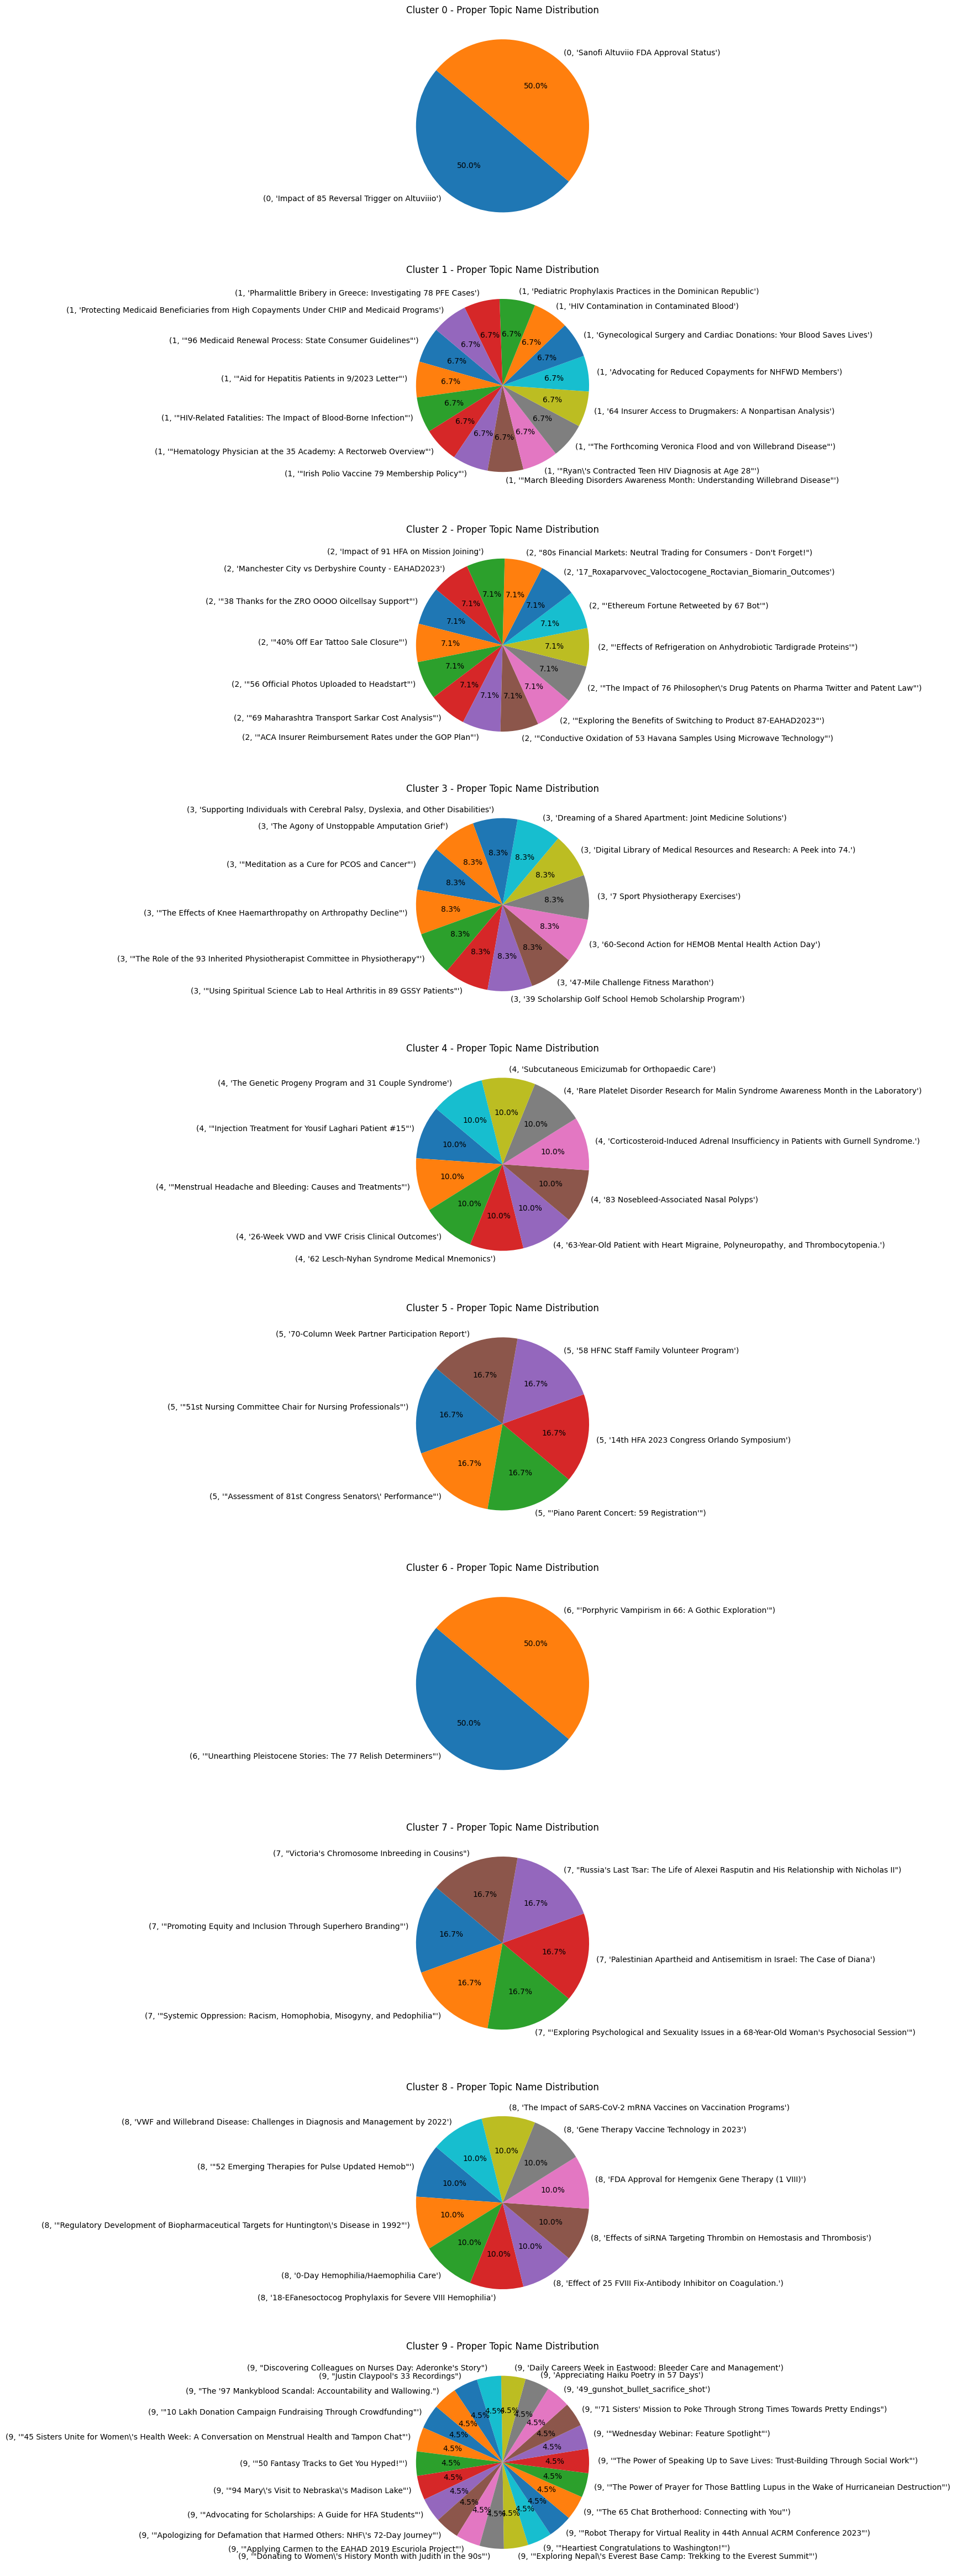

In [10]:
import matplotlib.pyplot as plt

# Group the dataframe by cluster labels and count the occurrences of each proper topic name
cluster_counts = topics_list.groupby('Cluster_Labels')['Proper_Topic_Names'].value_counts()

# Plot a pie chart for each cluster
num_clusters = len(cluster_counts.index.levels[0])
fig, axs = plt.subplots(num_clusters, figsize=(6, 6 * num_clusters))
for i, (cluster_label, counts) in enumerate(cluster_counts.groupby(level=0)):
    axs[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
    axs[i].set_title(f'Cluster {cluster_label} - Proper Topic Name Distribution')
plt.tight_layout()
plt.show()

In [11]:
import plotly.express as px
# add cluster labels to dataframe
topics_list['Cluster_Labels'] = kmeans.labels_

# count number of topics in each cluster
cluster_counts =topics_list['Cluster_Labels'].value_counts().sort_index()

# create pie chart using Plotly
fig = px.pie(
    names=cluster_counts.index,
    values=cluster_counts.values,
    title="Cluster Distribution"
)

# show the pie chart
fig.show()

In [12]:
# Create a dictionary of clusters and the topics in each cluster
cluster_dict = {}
for i in range(10):
    cluster_dict[i] = list(topics_list[topics_list['Cluster_Labels']==i]['Proper_Topic_Names'])

# Print the topics in each cluster
for i in range(10):
    print("Cluster {}:".format(i))
    for topic in cluster_dict[i]:
        print("- {}".format(topic))

Cluster 0:
- Sanofi Altuviio FDA Approval Status
- Impact of 85 Reversal Trigger on Altuviiio
Cluster 1:
- HIV Contamination in Contaminated Blood
- "March Bleeding Disorders Awareness Month: Understanding Willebrand Disease"
- "HIV-Related Fatalities: The Impact of Blood-Borne Infection"
- "Aid for Hepatitis Patients in 9/2023 Letter"
- Advocating for Reduced Copayments for NHFWD Members
- "Ryan's Contracted Teen HIV Diagnosis at Age 28"
- "Hematology Physician at the 35 Academy: A Rectorweb Overview"
- Protecting Medicaid Beneficiaries from High Copayments Under CHIP and Medicaid Programs
- Gynecological Surgery and Cardiac Donations: Your Blood Saves Lives
- 64 Insurer Access to Drugmakers: A Nonpartisan Analysis
- "The Forthcoming Veronica Flood and von Willebrand Disease"
- Pharmalittle Bribery in Greece: Investigating 78 PFE Cases
- "Irish Polio Vaccine 79 Membership Policy"
- Pediatric Prophylaxis Practices in the Dominican Republic
- "96 Medicaid Renewal Process: State Consumer

In [17]:
import pandas as pd
import re
import openai
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
import plotly.express as px

# Load a pre-trained sentence transformer model
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Function to clean the input tweet
def clean_tweet(tweet):
    # Convert to lowercase
    tweet = tweet.lower()
    # Remove URLs
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)
    # Remove mentions and hashtags
    tweet = re.sub(r'\@\w+|\#\w+', '', tweet)
    # Remove punctuation
    tweet = re.sub(r'[^\w\s]', '', tweet)
    # Remove extra whitespaces
    tweet = re.sub(r'\s+', ' ', tweet).strip()
    return tweet

# Function to generate a proper topic name using OpenAI
def generate_proper_topic_name(tweet):
    # Set up OpenAI API parameters
    openai.api_type = "azure"
    openai.api_key = "1b9938c280974153ad1e7cabc7580f11"
    openai.api_base = "https://cognizantaimlopenaidemoaccount.openai.azure.com/"
    openai.api_version = "2023-05-15"

    # Prompt to generate a proper topic name
    prompt = f"Generate a proper topic name for '{tweet}'."

    # Call the OpenAI API to generate a proper topic name
    response = openai.Completion.create(
        engine="GenAI",
        prompt=prompt,
        max_tokens=50,
        n=1,
        stop=None,
        temperature=0.6,
    )

    # Extract the generated topic name from the response
    generated_name = response['choices'][0]['text'].strip()

    # Check if the generated name is empty or null
    if generated_name == "":
        # Use the original tweet as a fallback
        generated_name = tweet

    return generated_name

# Function to predict the cluster label for a proper topic name
def predict_cluster(topic_name, model, kmeans, similarity_threshold=0.7):
    # Encode the topic name into a vector using the sentence transformer model
    topic_name_embedding = model.encode(topic_name, convert_to_tensor=True).unsqueeze(0)
    # Predict the cluster label using the pre-trained KMeans model
    cluster_distances = kmeans.transform(topic_name_embedding)
    min_distance = min(cluster_distances.flatten())
    if min_distance < similarity_threshold:
        cluster_label = int(cluster_distances.argmin())
    else:
        cluster_label = 'Other'
    return cluster_label, min_distance

# User input: new tweet
new_tweet = input("Enter a new tweet: ")

# Clean the input tweet
cleaned_tweet = clean_tweet(new_tweet)

# Generate a proper topic name for the cleaned tweet using OpenAI
proper_topic_name = generate_proper_topic_name(cleaned_tweet)

# Predict the cluster label for the proper topic name
cluster_label, similarity_score = predict_cluster(proper_topic_name, model, kmeans, similarity_threshold=0.7)

# Assign the new proper topic name to the existing cluster or to the "other" category if not similar to existing ones
if cluster_label != 'Other':
    # Assign to existing cluster
    topics_list.loc[topics_list['Cluster_Labels'] == cluster_label, 'Proper_Topic_Names'] = proper_topic_name
else:
    # Increment the count for "Other" category
    cluster_counts.loc[cluster_counts['Cluster_Labels'] == 'Other', 'Count'] += 1

# Update the pie chart
cluster_counts = topics_list['Cluster_Labels'].value_counts().reset_index(name='Count')
cluster_counts = cluster_counts.rename(columns={'index': 'Cluster_Labels'})

# Include "Other" category with count 0 if it doesn't exist
if 'Other' not in cluster_counts['Cluster_Labels'].values:
    other_row = pd.DataFrame({'Cluster_Labels': ['Other'], 'Count': [0]})
    cluster_counts = cluster_counts.append(other_row, ignore_index=True)

# Plot the updated pie chart using Plotly Express
fig = px.pie(cluster_counts, values='Count', names='Cluster_Labels', title='Distribution of Topics Across Clusters')
fig.show()

# Print similarity score for debugging
print("Similarity Score:", similarity_score)

Enter a new tweet: netflix and chilling


<ipython-input-17-ca615012924d>:94: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison

<ipython-input-17-ca615012924d>:96: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Similarity Score: 6.412072310946615


In [18]:
# Print where the new tweet has gone
print(f"The new tweet '{proper_topic_name}' has been assigned to Cluster {new_cluster_label}.")

The new tweet '"Netflix Binge and Chill"' has been assigned to Cluster 10.


In [19]:
import pandas as pd
import re
import openai
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
import plotly.express as px

# Load a pre-trained sentence transformer model
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Function to clean the input tweet
def clean_tweet(tweet):
    # Convert to lowercase
    tweet = tweet.lower()
    # Remove URLs
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)
    # Remove mentions and hashtags
    tweet = re.sub(r'\@\w+|\#\w+', '', tweet)
    # Remove punctuation
    tweet = re.sub(r'[^\w\s]', '', tweet)
    # Remove extra whitespaces
    tweet = re.sub(r'\s+', ' ', tweet).strip()
    return tweet

# Function to generate a proper topic name using OpenAI
def generate_proper_topic_name(tweet):
    # Set up OpenAI API parameters
    openai.api_type = "azure"
    openai.api_key = "1b9938c280974153ad1e7cabc7580f11"
    openai.api_base = "https://cognizantaimlopenaidemoaccount.openai.azure.com/"
    openai.api_version = "2023-05-15"

    # Prompt to generate a proper topic name
    prompt = f"Generate a proper topic name for '{tweet}'."

    # Call the OpenAI API to generate a proper topic name
    response = openai.Completion.create(
        engine="GenAI",
        prompt=prompt,
        max_tokens=50,
        n=1,
        stop=None,
        temperature=0.6,
    )

    # Extract the generated topic name from the response
    generated_name = response['choices'][0]['text'].strip()

    # Check if the generated name is empty or null
    if generated_name == "":
        # Use the original tweet as a fallback
        generated_name = tweet

    return generated_name

# Function to predict the cluster label for a proper topic name
def predict_cluster(topic_name, model, kmeans, other_bucket_label='Other', similarity_threshold=0.7):
    # Encode the topic name into a vector using the sentence transformer model
    topic_name_embedding = model.encode(topic_name, convert_to_tensor=True).unsqueeze(0)
    # Predict the cluster label using the pre-trained KMeans model
    cluster_distances = kmeans.transform(topic_name_embedding)
    min_distance = min(cluster_distances.flatten())
    if min_distance < similarity_threshold:
        cluster_label = int(cluster_distances.argmin())
    else:
        cluster_label = other_bucket_label
    return cluster_label, min_distance

# Function to add new tweet to "Other" bucket
def add_tweet_to_other_bucket(tweet, topics_list, other_bucket_label='Other'):
    # Generate a proper topic name for the cleaned tweet using OpenAI
    proper_topic_name = generate_proper_topic_name(tweet)
    # Predict the cluster label for the proper topic name
    cluster_label, similarity_score = predict_cluster(proper_topic_name, model, kmeans)
    if cluster_label == other_bucket_label:
        # Add the new tweet to the "Other" bucket
        topics_list = topics_list.append({'Proper_Topic_Names': proper_topic_name, 'Cluster_Labels': other_bucket_label}, ignore_index=True)
        print(f"The new tweet '{proper_topic_name}' has been assigned to the '{other_bucket_label}' bucket.")
    else:
        print(f"The new tweet '{proper_topic_name}' has been assigned to Cluster {cluster_label}.")
    return topics_list

# Load or create the initial topics list dataframe
topics_list = pd.DataFrame(columns=['Proper_Topic_Names', 'Cluster_Labels'])

# Load or create the initial cluster counts dataframe
cluster_counts = pd.DataFrame(columns=['Cluster_Labels', 'Count'])

# User input: new tweet
new_tweet = input("Enter a new tweet: ")

# Clean the input tweet
cleaned_tweet = clean_tweet(new_tweet)

# Add the new tweet to the "Other" bucket if it doesn't match any existing clusters
topics_list = add_tweet_to_other_bucket(cleaned_tweet, topics_list)

# Update the pie chart
cluster_counts = topics_list['Cluster_Labels'].value_counts().reset_index(name='Count')
cluster_counts = cluster_counts.rename(columns={'index': 'Cluster_Labels'})

# Include "Other" category with count 0 if it doesn't exist
if 'Other' not in cluster_counts['Cluster_Labels'].values:
    other_row = pd.DataFrame({'Cluster_Labels': ['Other'], 'Count': [0]})
    cluster_counts = cluster_counts.append(other_row, ignore_index=True)

# Plot the updated pie chart using Plotly Express
fig = px.pie(cluster_counts, values='Count', names='Cluster_Labels', title='Distribution of Topics Across Clusters')
fig.show()

Enter a new tweet: cartooon network
The new tweet 'Cartoon Network TV' has been assigned to the 'Other' bucket.


<ipython-input-19-a18969bdfd8b>:77: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

